<a href="https://colab.research.google.com/github/riccardocappi/Machine_Learning_Course/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Super simple Ridge Regression###
**Riccardo Cappi, 2073768**

In [ ]:

#Importing stuff
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset downloaded from https://www.kaggle.com/datasets/kennethjohn/housingprice
# The dataset contains some information about housing in Portland, such as size, number of bedrooms and price
dataset = pd.read_csv('./Housing in portland dataset.csv', header=None)
dataset = dataset[[0,2]]
# For this example i'll only consider size and price columns
size_label = 'Size in feet^2 (x)'
price_label = 'Price ($)(y)'
dataset.columns = ([size_label,price_label])
print(dataset.head())

   Size in feet^2 (x)  Price ($)(y)
0                2104        399900
1                1600        329900
2                2400        369000
3                1416        232000
4                3000        539900


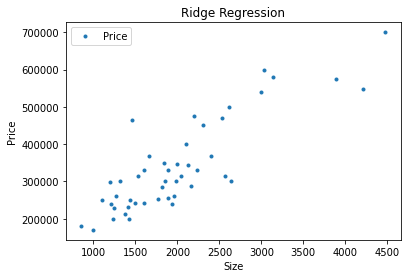

In [ ]:
def plot_df(df):
  df.plot(
      x=size_label,
      y=price_label,
      title='Ridge Regression',
      xlabel = 'Size',
      ylabel = 'Price',
      style = '.',
      label='Price'
  )
plot_df(dataset)

In [ ]:
def fit_model(df):
  X = df[size_label].values
  X = np.reshape(X, (len(X),1)) #Reshape array X in order to make it compatible with the sklearn.Ridge.fit method
  Y = df[price_label].values

  model = Ridge(alpha=1.0)
  model.fit(X,Y)
  # Returns the predicted y values (using linear model)
  return X,model.predict(X)

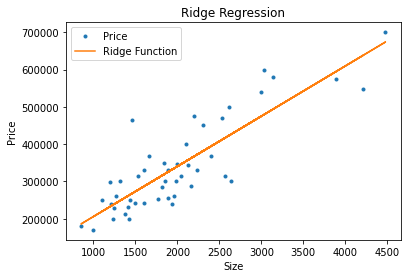

In [ ]:
def plot_ridge_function(df):
  X,y_pred = fit_model(df)
  plot_df(df)
  plt.plot(X,y_pred,label='Ridge Function')
  plt.legend()
  plt.show()

plot_ridge_function(dataset)

###Let's try to use another Dataset###

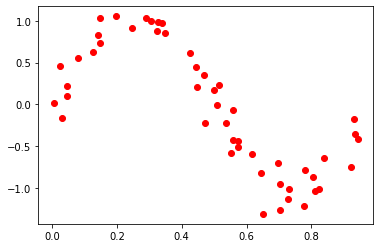

In [ ]:
n_samples = 50
X = np.sort(np.random.rand(n_samples,1),axis=0)
f = lambda x: np.sin(2*np.pi*x)
# Adding Gaussian noise
noise = np.random.normal(0,0.2,size=(n_samples,1))
Y = f(X) + noise
plt.plot(X,Y,'ro')
plt.show()

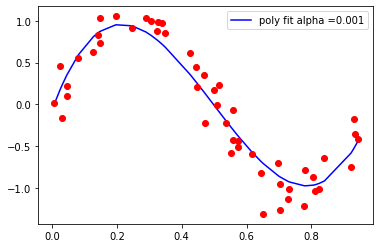

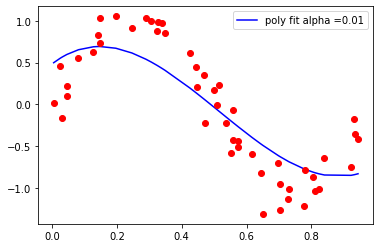

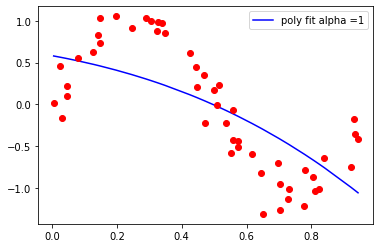

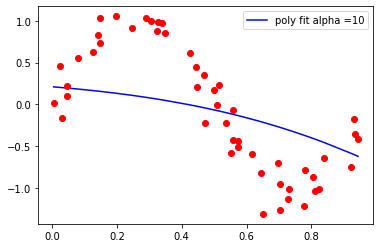

In [ ]:
# I found here https://www.kaggle.com/code/elyas19/implementing-polynomial-ridge-regression
# a code example that implements polynomial ridge regression from scratch

def ridge_regression_from_scratch(N, x_train, y_train, poly_deg,alpha):
  a = alpha
  Q_train = np.zeros(shape = (N,poly_deg+1))
  Q_train[:,0] = 1
  for i in range(1,poly_deg+1):
      Q_train[:,i] = np.power(x_train,i).reshape((N,))    

  W = np.linalg.pinv((Q_train.T.dot(Q_train) + a*np.eye(poly_deg+1))).dot(Q_train.T).dot(y_train)
  plt.plot(x_train,Q_train.dot(W),'b',label='poly fit alpha =' + str(alpha))
  plt.plot(X,Y,'ro')
  plt.legend()
  plt.show()

# Trying different values of alpha
ridge_regression_from_scratch(n_samples,X,Y,3,0.001)
ridge_regression_from_scratch(n_samples,X,Y,3,0.01)
ridge_regression_from_scratch(n_samples,X,Y,3,1)
ridge_regression_from_scratch(n_samples,X,Y,3,10)